In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
ushuaia ar
bluff nz
ponta do sol cv
esperance au
morondava mg
vardo no
san cristobal ec
punta arenas cl
saint-joseph re
rikitea pf
ushuaia ar
port moresby pg
tuktoyaktuk ca
singaparna id
nome us
karaul ru
atuona pf
vestmannaeyjar is
avarua ck
xunchang cn
aasiaat gl
kimbe pg
smidovich ru
iqaluit ca
mataura pf
hilo us
east london za
parry sound ca
vaini to
pacific grove us
airai pw
bredasdorp za
mrirt ma
severo-kurilsk ru
bluff nz
airai pw
arlit ne
nikolskoye ru
bluff nz
abeche td
saryshagan kz
punta arenas cl
gat ly
ushuaia ar
bengkulu id
busselton au
mombetsu jp
rikitea pf
mount gambier au
tasiilaq gl
vaini to
albany au
alice springs au
lompoc us
kaitangata nz
narsaq gl
atuona pf
palabuhanratu id
constitucion cl
boyuibe bo
ribeira grande pt
mahebourg mu
victoria sc
arraial do cabo br
kondopoga ru
mar del plata ar
saint-philippe re
shahrud ir
butaritari ki
catuday ph
mataura pf
carnarvon au
milkovo ru
lavrentiya ru
sur om
los llanos de aridane es
provideniya ru
taolanaro mg
v

cape town za
yulara au
senneterre ca
steenbergen nl
punta arenas cl
san quintin mx
new norfolk au
hovd mn
hami cn
carnarvon au
sorvag fo
new norfolk au
espanola ca
mubi ng
ushuaia ar
kamariotissa gr
albany au
bethel us
nome us
quelimane mz
bredasdorp za
luderitz na
beira mz
punta arenas cl
punta arenas cl
mataura pf
hobyo so
palabuhanratu id
avarua ck
albany au
canaries lc
atuona pf
lompoc us
barentsburg sj
busselton au
mooi river za
khatanga ru
zhanatas kz
barentsburg sj
rikitea pf
los llanos de aridane es
albany au
carahue cl
saskylakh ru
kaitangata nz
nizhneyansk ru
kruisfontein za
wladyslawowo pl
lahaina us
severodvinsk ru
torbay ca
holbeach gb
liku wf
new norfolk au
busselton au
saint-pierre pm
daxian cn
sitka us
rio grande br
port hedland au
tuktoyaktuk ca
albany au
barrow us
luanda ao
jamestown sh
ushuaia ar
barentsburg sj
taolanaro mg
banes cu
yablonovo ru
mehriz ir
thompson ca
port alfred za
busselton au
lompoc us
torbay ca
nikolskoye ru
belushya guba ru
port hardy ca
bismarck

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 19 | ushuaia
Processing Record 2 of Set 19 | bluff
Processing Record 3 of Set 19 | ponta do sol
Processing Record 4 of Set 19 | esperance
Processing Record 5 of Set 19 | morondava
Processing Record 6 of Set 19 | vardo
Processing Record 7 of Set 19 | san cristobal
Processing Record 8 of Set 19 | punta arenas
Processing Record 9 of Set 19 | saint-joseph
Processing Record 10 of Set 19 | rikitea
Processing Record 11 of Set 19 | port moresby
Processing Record 12 of Set 19 | tuktoyaktuk
Processing Record 13 of Set 19 | singaparna
Processing Record 14 of Set 19 | nome
Processing Record 15 of Set 19 | karaul
City not found. Skipping...
Processing Record 16 of Set 19 | atuona
Processing Record 17 of Set 19 | vestmannaeyjar
Processing Record 18 of Set 19 | avarua
Processing Record 19 of Set 19 | xunchang
Processing Record 20 of Set 19 | aasiaat
Processing Record 21 of Set 19 | kimbe
Processing Record 22 of Set 19 | smidovich
Processing Record 23 of Set 19 | iqaluit
Pro

Processing Record 31 of Set 22 | barrow
Processing Record 32 of Set 22 | la ronge
Processing Record 33 of Set 22 | clyde river
Processing Record 34 of Set 22 | egvekinot
Processing Record 35 of Set 22 | quesnel
Processing Record 36 of Set 22 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 22 | bandarbeyla
Processing Record 38 of Set 22 | souillac
Processing Record 39 of Set 22 | nanortalik
Processing Record 40 of Set 22 | grand gaube
Processing Record 41 of Set 22 | lagoa
Processing Record 42 of Set 22 | nakusp
Processing Record 43 of Set 22 | padang
Processing Record 44 of Set 22 | evanston
Processing Record 45 of Set 22 | kodiak
Processing Record 46 of Set 22 | te anau
Processing Record 47 of Set 22 | mount kisco
Processing Record 48 of Set 22 | yerbogachen
Processing Record 49 of Set 22 | biloela
Processing Record 50 of Set 22 | vao
Processing Record 1 of Set 23 | kungurtug
Processing Record 2 of Set 23 | plettenberg bay
Processing Record 3 of Set 23 | ilulissa

Processing Record 17 of Set 26 | chicama
Processing Record 18 of Set 26 | kruisfontein
Processing Record 19 of Set 26 | asau
Processing Record 20 of Set 26 | lithgow
Processing Record 21 of Set 26 | myitkyina
Processing Record 22 of Set 26 | saint-francois
Processing Record 23 of Set 26 | marcona
City not found. Skipping...
Processing Record 24 of Set 26 | yugorsk
Processing Record 25 of Set 26 | ruidoso
Processing Record 26 of Set 26 | isla mujeres
Processing Record 27 of Set 26 | yeppoon
Processing Record 28 of Set 26 | lang son
Processing Record 29 of Set 26 | sambava
Processing Record 30 of Set 26 | rawson
Processing Record 31 of Set 26 | dingle
Processing Record 32 of Set 26 | pervomayskoye
Processing Record 33 of Set 26 | kolokani
Processing Record 34 of Set 26 | evensk
Processing Record 35 of Set 26 | sunnyside
Processing Record 36 of Set 26 | novokruchininskiy
Processing Record 37 of Set 26 | chapais
Processing Record 38 of Set 26 | mackay
Processing Record 39 of Set 26 | saint

Processing Record 1 of Set 30 | tartus
Processing Record 2 of Set 30 | sioux lookout
Processing Record 3 of Set 30 | fort frances
Processing Record 4 of Set 30 | sobolevo
Processing Record 5 of Set 30 | inuvik
Processing Record 6 of Set 30 | wahran
City not found. Skipping...
Processing Record 7 of Set 30 | roma
Processing Record 8 of Set 30 | baykit
Processing Record 9 of Set 30 | tambovka
Processing Record 10 of Set 30 | hudiksvall
Processing Record 11 of Set 30 | arenal
Processing Record 12 of Set 30 | saint anthony
Processing Record 13 of Set 30 | bargal
City not found. Skipping...
Processing Record 14 of Set 30 | pelym
Processing Record 15 of Set 30 | andevoranto
City not found. Skipping...
Processing Record 16 of Set 30 | aporawan
City not found. Skipping...
Processing Record 17 of Set 30 | ndjole
Processing Record 18 of Set 30 | dahuk
Processing Record 19 of Set 30 | kenai
Processing Record 20 of Set 30 | raga
Processing Record 21 of Set 30 | celendin
Processing Record 22 of Set

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.66,53,0,18.41,AR,2021-10-30 18:17:04
1,Bluff,-46.6000,168.3333,53.69,62,21,18.57,NZ,2021-10-30 18:15:28
2,Ponta Do Sol,32.6667,-17.1000,73.13,71,69,8.41,PT,2021-10-30 18:17:49
3,Esperance,-33.8667,121.9000,56.26,71,2,15.93,AU,2021-10-30 18:19:12
4,Morondava,-20.2833,44.2833,75.67,73,24,11.70,MG,2021-10-30 18:19:29
5,Vardo,70.3705,31.1107,39.40,77,56,8.19,NO,2021-10-30 18:18:54
6,San Cristobal,7.7669,-72.2250,77.18,87,98,3.58,VE,2021-10-30 18:18:24
7,Punta Arenas,-53.1500,-70.9167,53.11,40,36,4.65,CL,2021-10-30 18:15:08
8,Saint-Joseph,-21.3667,55.6167,70.18,79,63,2.80,RE,2021-10-30 18:19:30
9,Rikitea,-23.1203,-134.9692,74.77,85,86,21.70,PF,2021-10-30 18:17:06


In [19]:
new_column_order = ["City", "Country",  "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

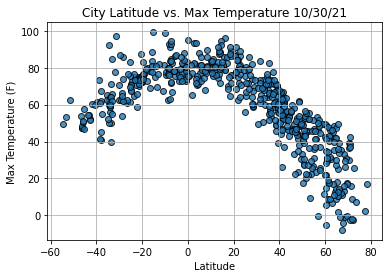

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

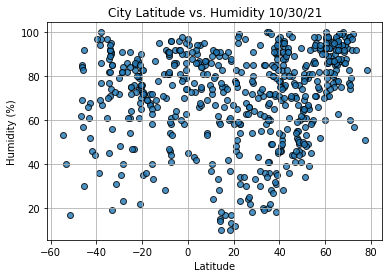

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

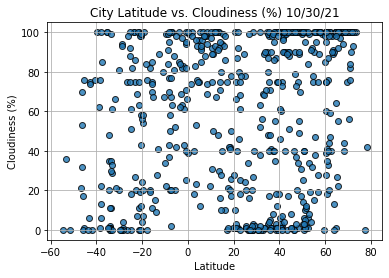

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()